In [754]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [756]:
df = pd.read_csv("Car_price_2024(2).csv")

In [758]:
df.head()

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,Nissan Altima,2007,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,8005.469674,two,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000,36245.697
1,Toyota Corolla,2019,Electric,Manual,4.0,Excellent,Beige,Yes,No,Yes,...,25385.241860,two,-0.001383,2.696626,3543.00629,182.1,60.0,894.742606,4689,10736.91127
2,Honda CR-V,2004,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,6553.601733,three,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190,41953.92523
3,Toyota Corolla,2020,Electric,Manual,4.0,Good,Brown,Yes,Yes,Yes,...,24381.083350,three,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720,12446.97569
4,Toyota Tundra,2017,Hybrid,Automatic,4.0,Good,Brown,Yes,No,No,...,28357.830640,five,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559,10560.54904


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2227 non-null   object 
 3   Transmission       2223 non-null   object 
 4   DoorsNum           2223 non-null   float64
 5   Condition          2230 non-null   object 
 6   Color              2228 non-null   object 
 7   Cruise             2230 non-null   object 
 8   Leather_Seats      2230 non-null   object 
 9   Heated_Seats       2230 non-null   object 
 10  Navigation         2230 non-null   object 
 11  Owners             2230 non-null   int64  
 12  Insurance          2230 non-null   object 
 13  Service_History    2230 non-null   object 
 14  Safety             2230 non-null   object 
 15  Premium_Sound      2230 non-null   object 
 16  Multimedia         2230 

In [762]:
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (2230, 32)


In [764]:
df['Estimated_Mileage'] = df['Estimated_Mileage'].astype(str)
df['Estimated_Mileage'] = df['Estimated_Mileage'].str.extract(r'(\d+\.?\d*)', expand=False)
df['Estimated_Mileage'] = pd.to_numeric(df['Estimated_Mileage'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

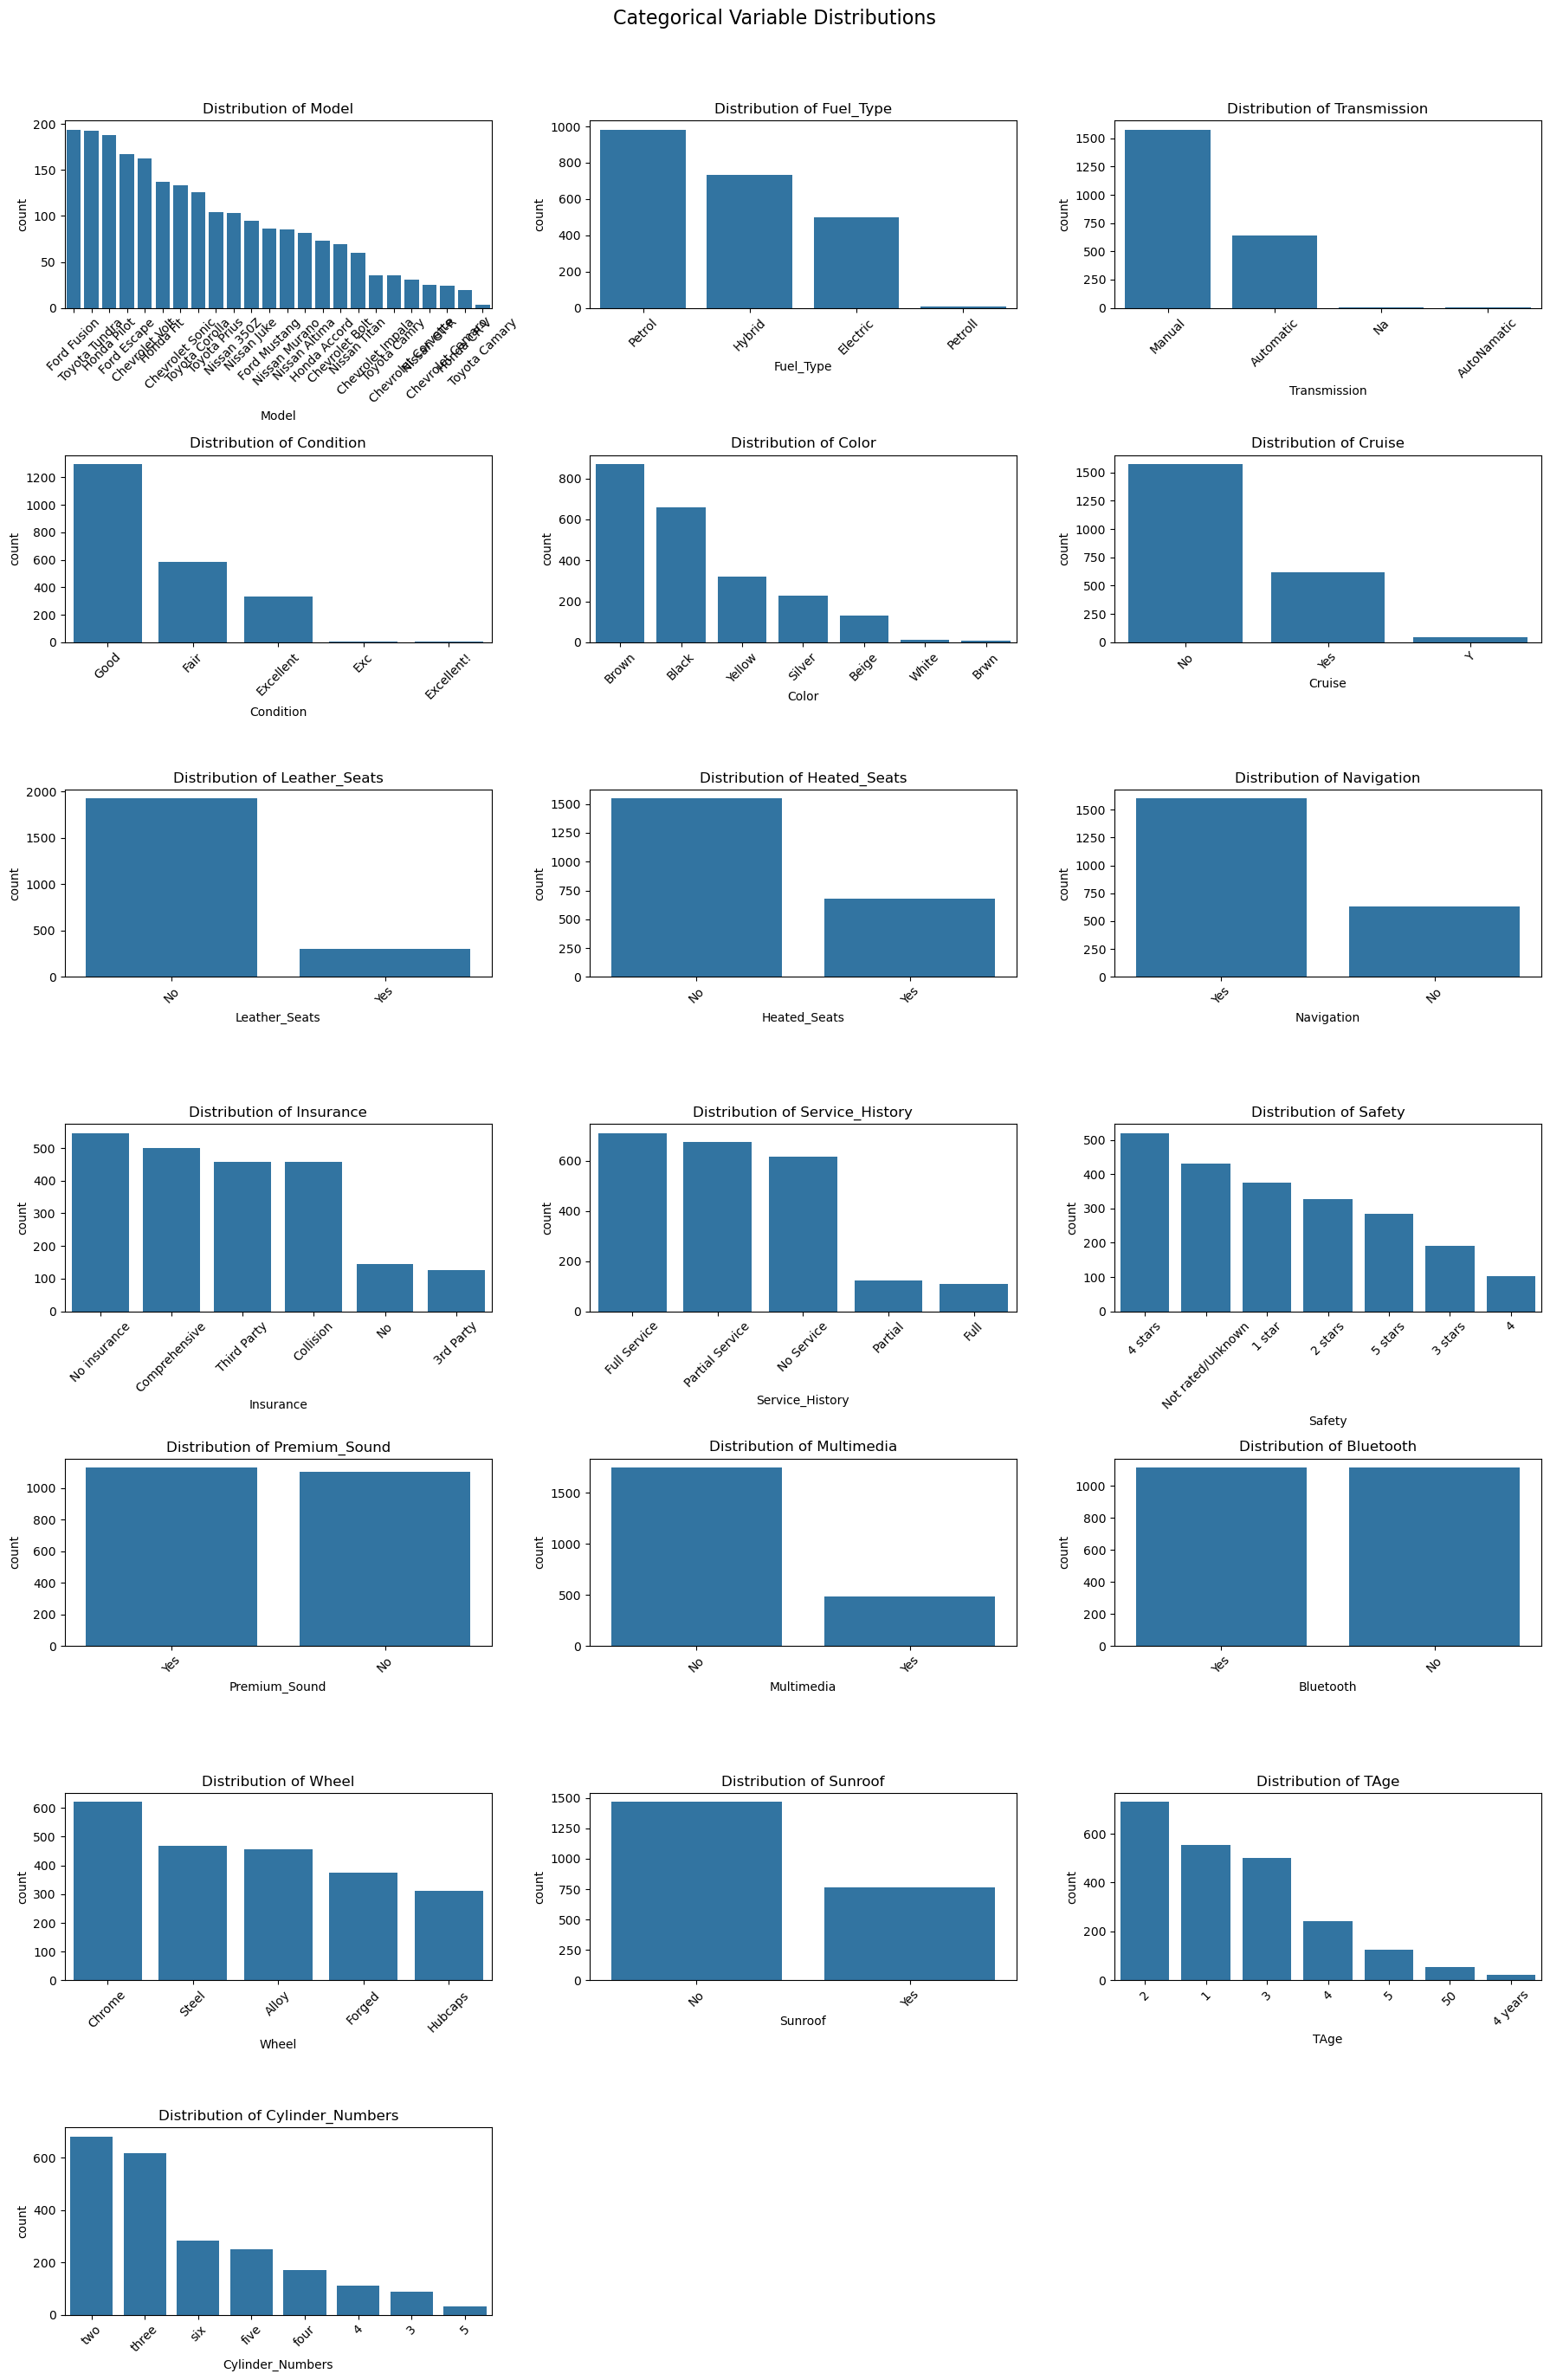

In [766]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()


n_cols = 3
n_rows = int(np.ceil(len(categorical_vars) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Categorical Variable Distributions', fontsize=16)

for i, col in enumerate(categorical_vars):
    row = i // n_cols
    col_idx = i % n_cols
    sns.countplot(x=col, data=df, ax=axs[row, col_idx], order=df[col].value_counts().index)
    axs[row, col_idx].set_title(f'Distribution of {col}')
    axs[row, col_idx].tick_params(axis='x', rotation=45)


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

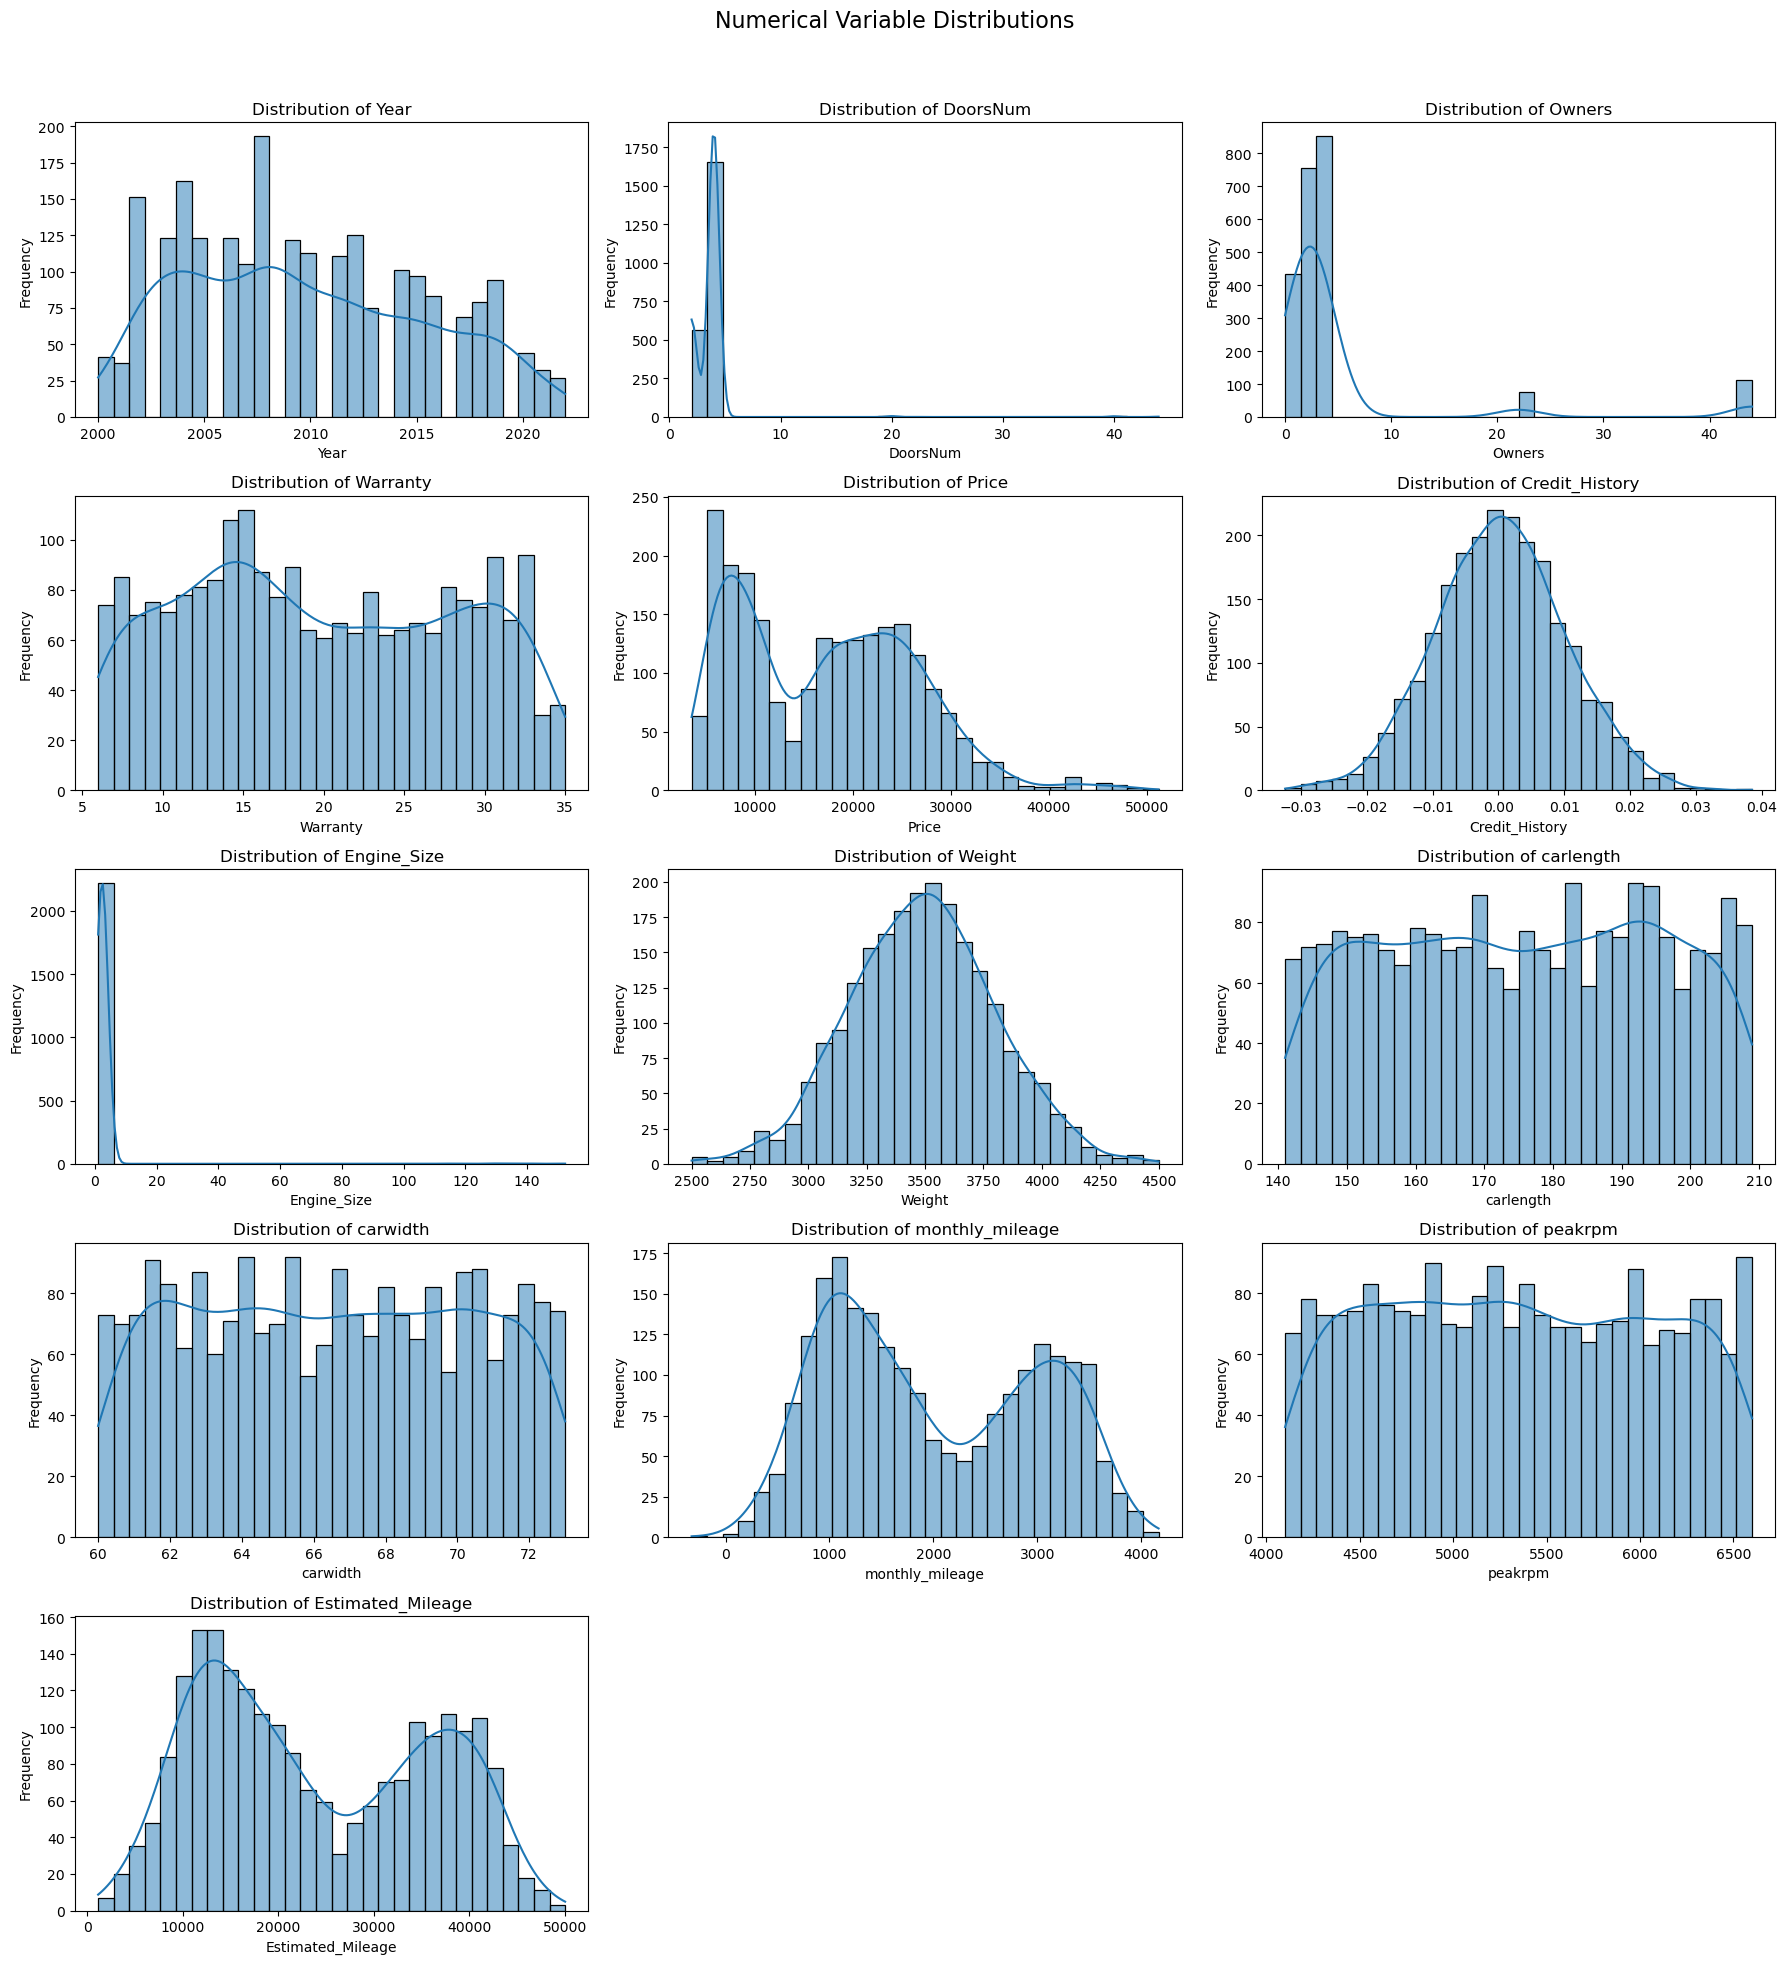

In [768]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


n_cols = 3
n_rows = int(np.ceil(len(numerical_vars) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Numerical Variable Distributions', fontsize=16)


for i, col in enumerate(numerical_vars):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df[col], kde=True, ax=axs[row, col_idx], bins=30)
    axs[row, col_idx].set_title(f'Distribution of {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Frequency')


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [770]:
df.isnull().sum()

Model                0
Year                 0
Fuel_Type            3
Transmission         7
DoorsNum             7
Condition            0
Color                2
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               3
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64

In [772]:
df = df[(df['Owners'] >= 1) & (df['Owners'] <= 10)]

In [774]:
df.isnull().sum()

Model                0
Year                 0
Fuel_Type            1
Transmission         7
DoorsNum             5
Condition            0
Color                2
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               3
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64

In [776]:
import warnings
warnings.filterwarnings("ignore")

Service_History = {'Full': 'Full Service ', 'Partial': 'Partial Service'}
Service_History = {k: v.rstrip() for k, v in Service_History.items()}


df.replace({
    'Fuel_Type': {'Petroll': 'Petrol'},
    'Transmission': {'AutoNamatic': 'Automatic'},
    'Condition': {'Exc': 'Excellent', 'Excellent!': 'Excellent'},
    'Color': {'Brwn': 'Brown'},
    'Cruise': {'Y': 'Yes'},
    'Insurance': {'No': 'No insurance', '3rd Party': 'Third Party'},
    'Service_History': Service_History,
    'Safety': {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5, 'Not rated/Unknown': 0, '4': 4},
    'TAge': {'4 years': 4, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '50': 50},
    'Cylinder_Numbers': {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, '3': 3, '4': 4, '5': 5}
}, inplace=True)

In [778]:
df.replace(to_replace=['Na', 'NA', "null"], value=np.nan, inplace=True)

In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2031 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2031 non-null   object 
 1   Year               2031 non-null   int64  
 2   Fuel_Type          2030 non-null   object 
 3   Transmission       2022 non-null   object 
 4   DoorsNum           2026 non-null   float64
 5   Condition          2031 non-null   object 
 6   Color              2029 non-null   object 
 7   Cruise             2031 non-null   object 
 8   Leather_Seats      2031 non-null   object 
 9   Heated_Seats       2031 non-null   object 
 10  Navigation         2031 non-null   object 
 11  Owners             2031 non-null   int64  
 12  Insurance          2031 non-null   object 
 13  Service_History    2031 non-null   object 
 14  Safety             2031 non-null   int64  
 15  Premium_Sound      2031 non-null   object 
 16  Multimedia         2031 non-n

In [784]:
from sklearn.impute import SimpleImputer


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])


cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [786]:
df.isnull().sum()

Model                0
Year                 0
Fuel_Type            0
Transmission         0
DoorsNum             0
Condition            0
Color                0
Cruise               0
Leather_Seats        0
Heated_Seats         0
Navigation           0
Owners               0
Insurance            0
Service_History      0
Safety               0
Premium_Sound        0
Multimedia           0
Bluetooth            0
Wheel                0
Sunroof              0
Warranty             0
TAge                 0
Price                0
Cylinder_Numbers     0
Credit_History       0
Engine_Size          0
Weight               0
carlength            0
carwidth             0
monthly_mileage      0
peakrpm              0
Estimated_Mileage    0
dtype: int64

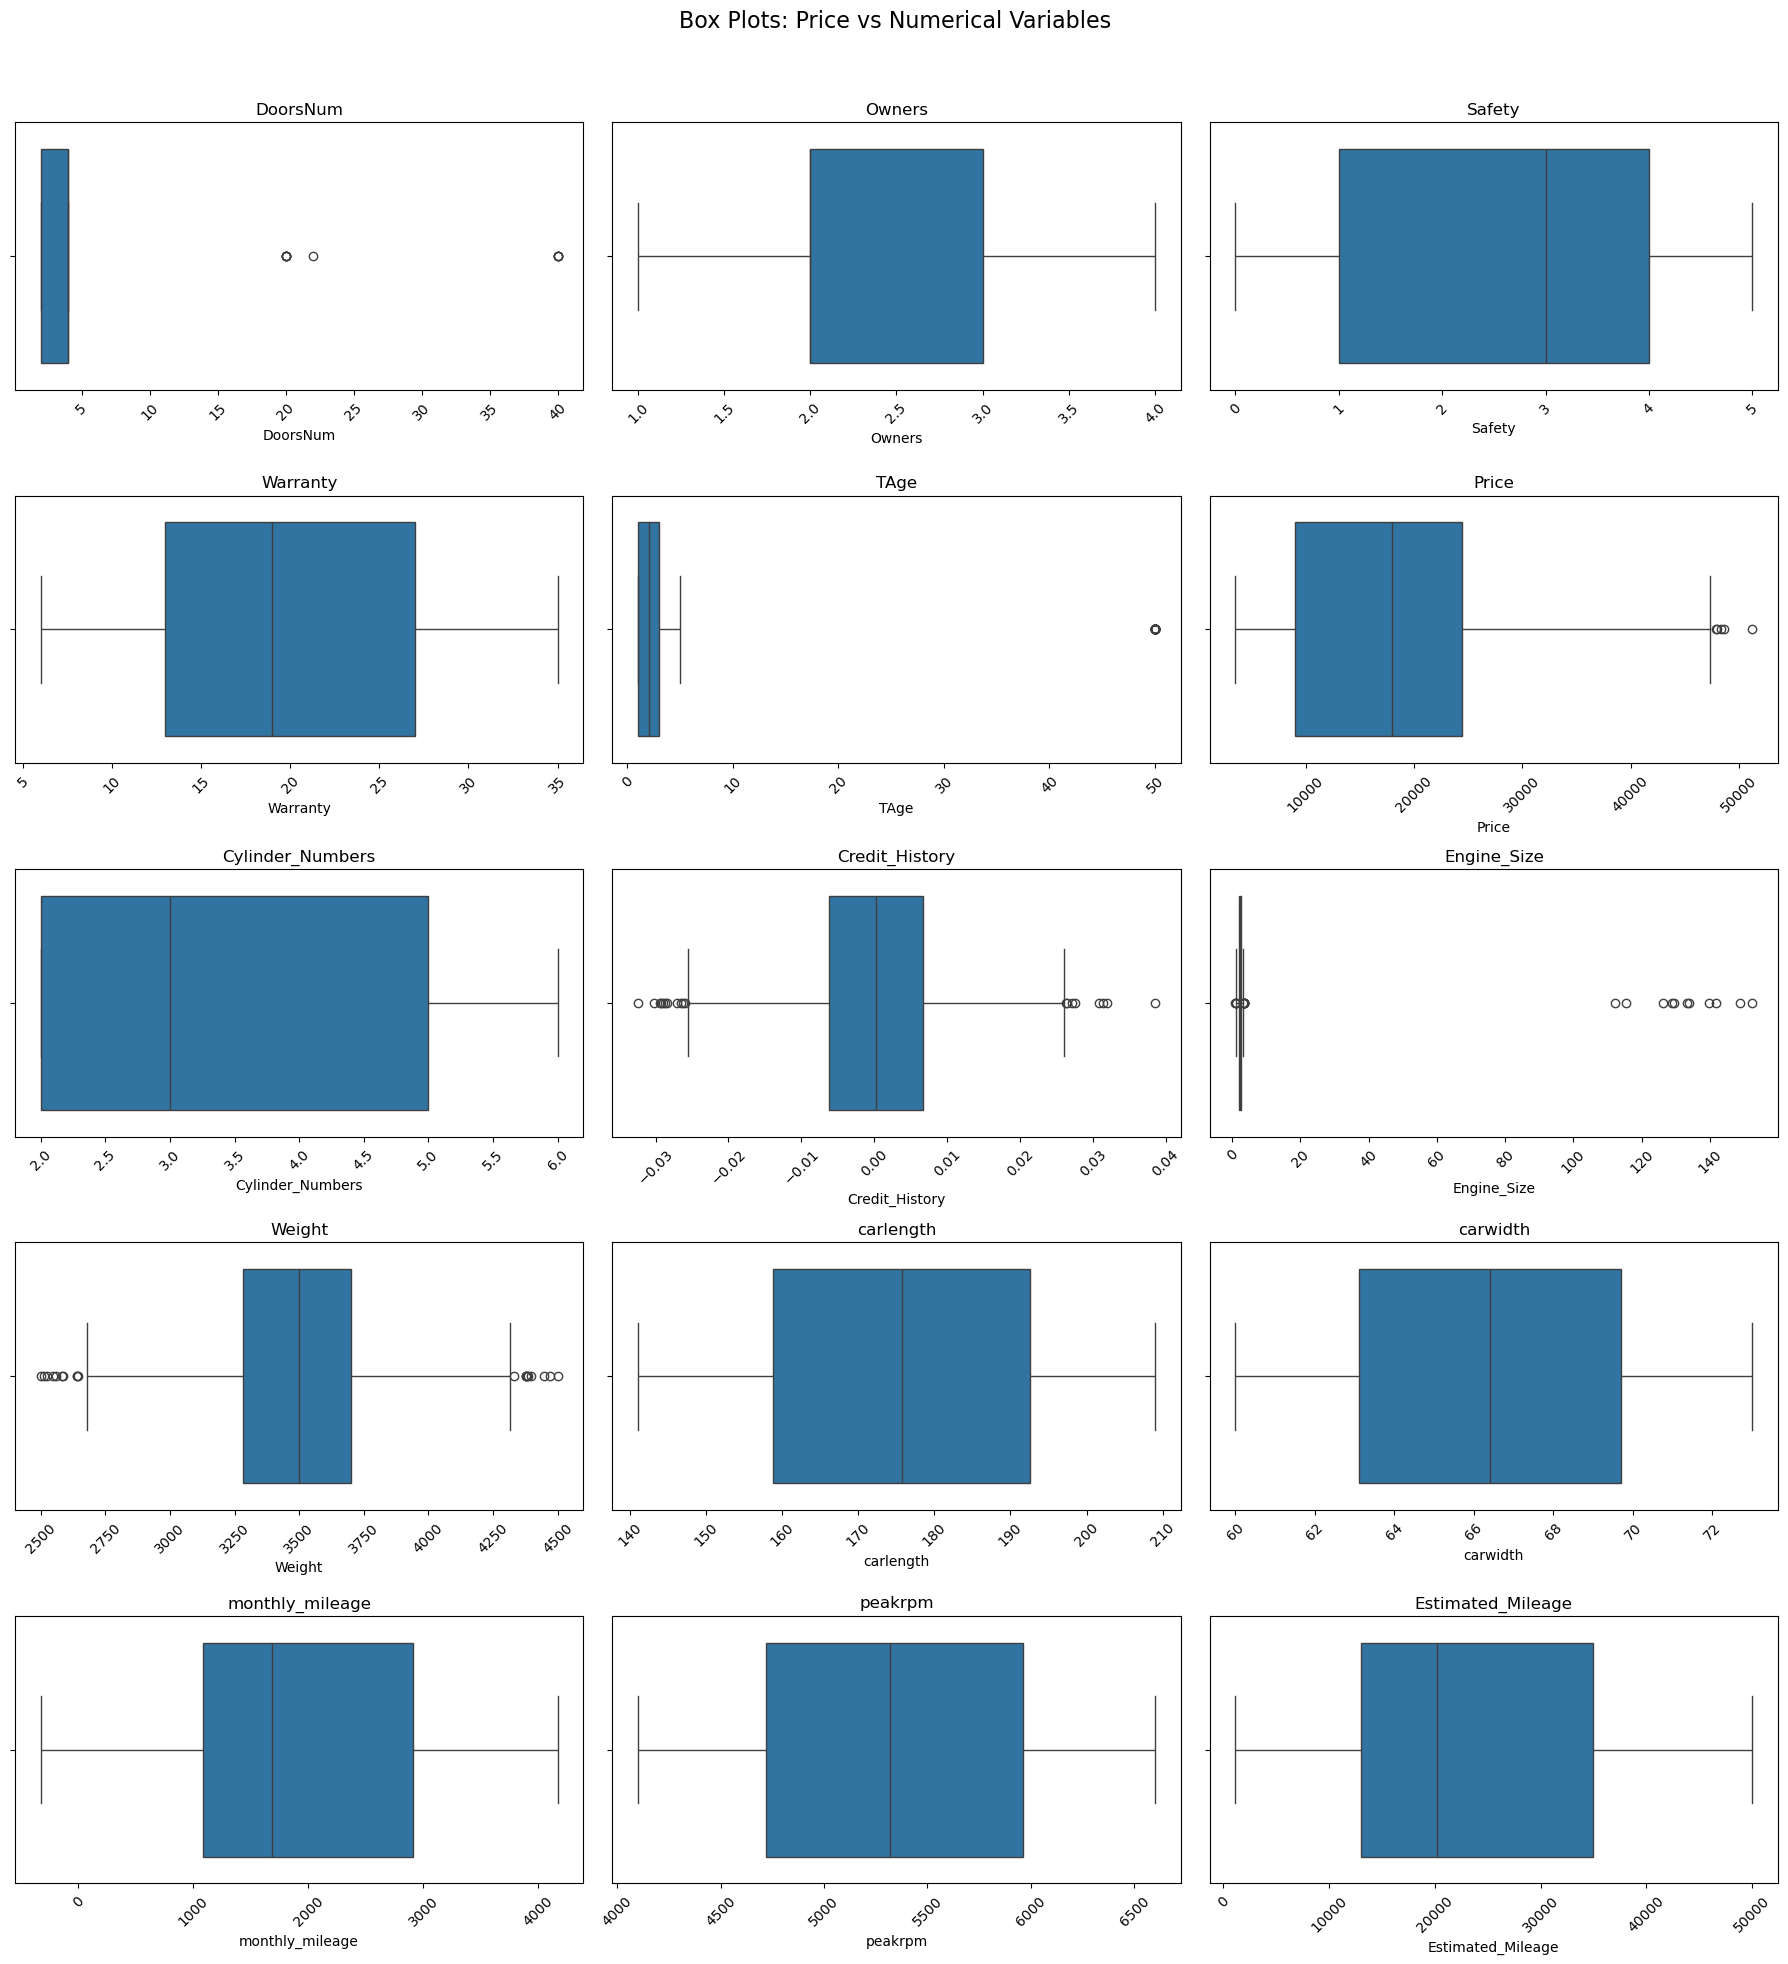

In [788]:
numerical_columns = df.select_dtypes(include='number').columns.drop(['Year']).tolist()

n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Box Plots: Price vs Numerical Variables', fontsize=16)

for i, feature in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{feature}')
    axs[row, col].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [790]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    df = remove_outliers_iqr(df, col)


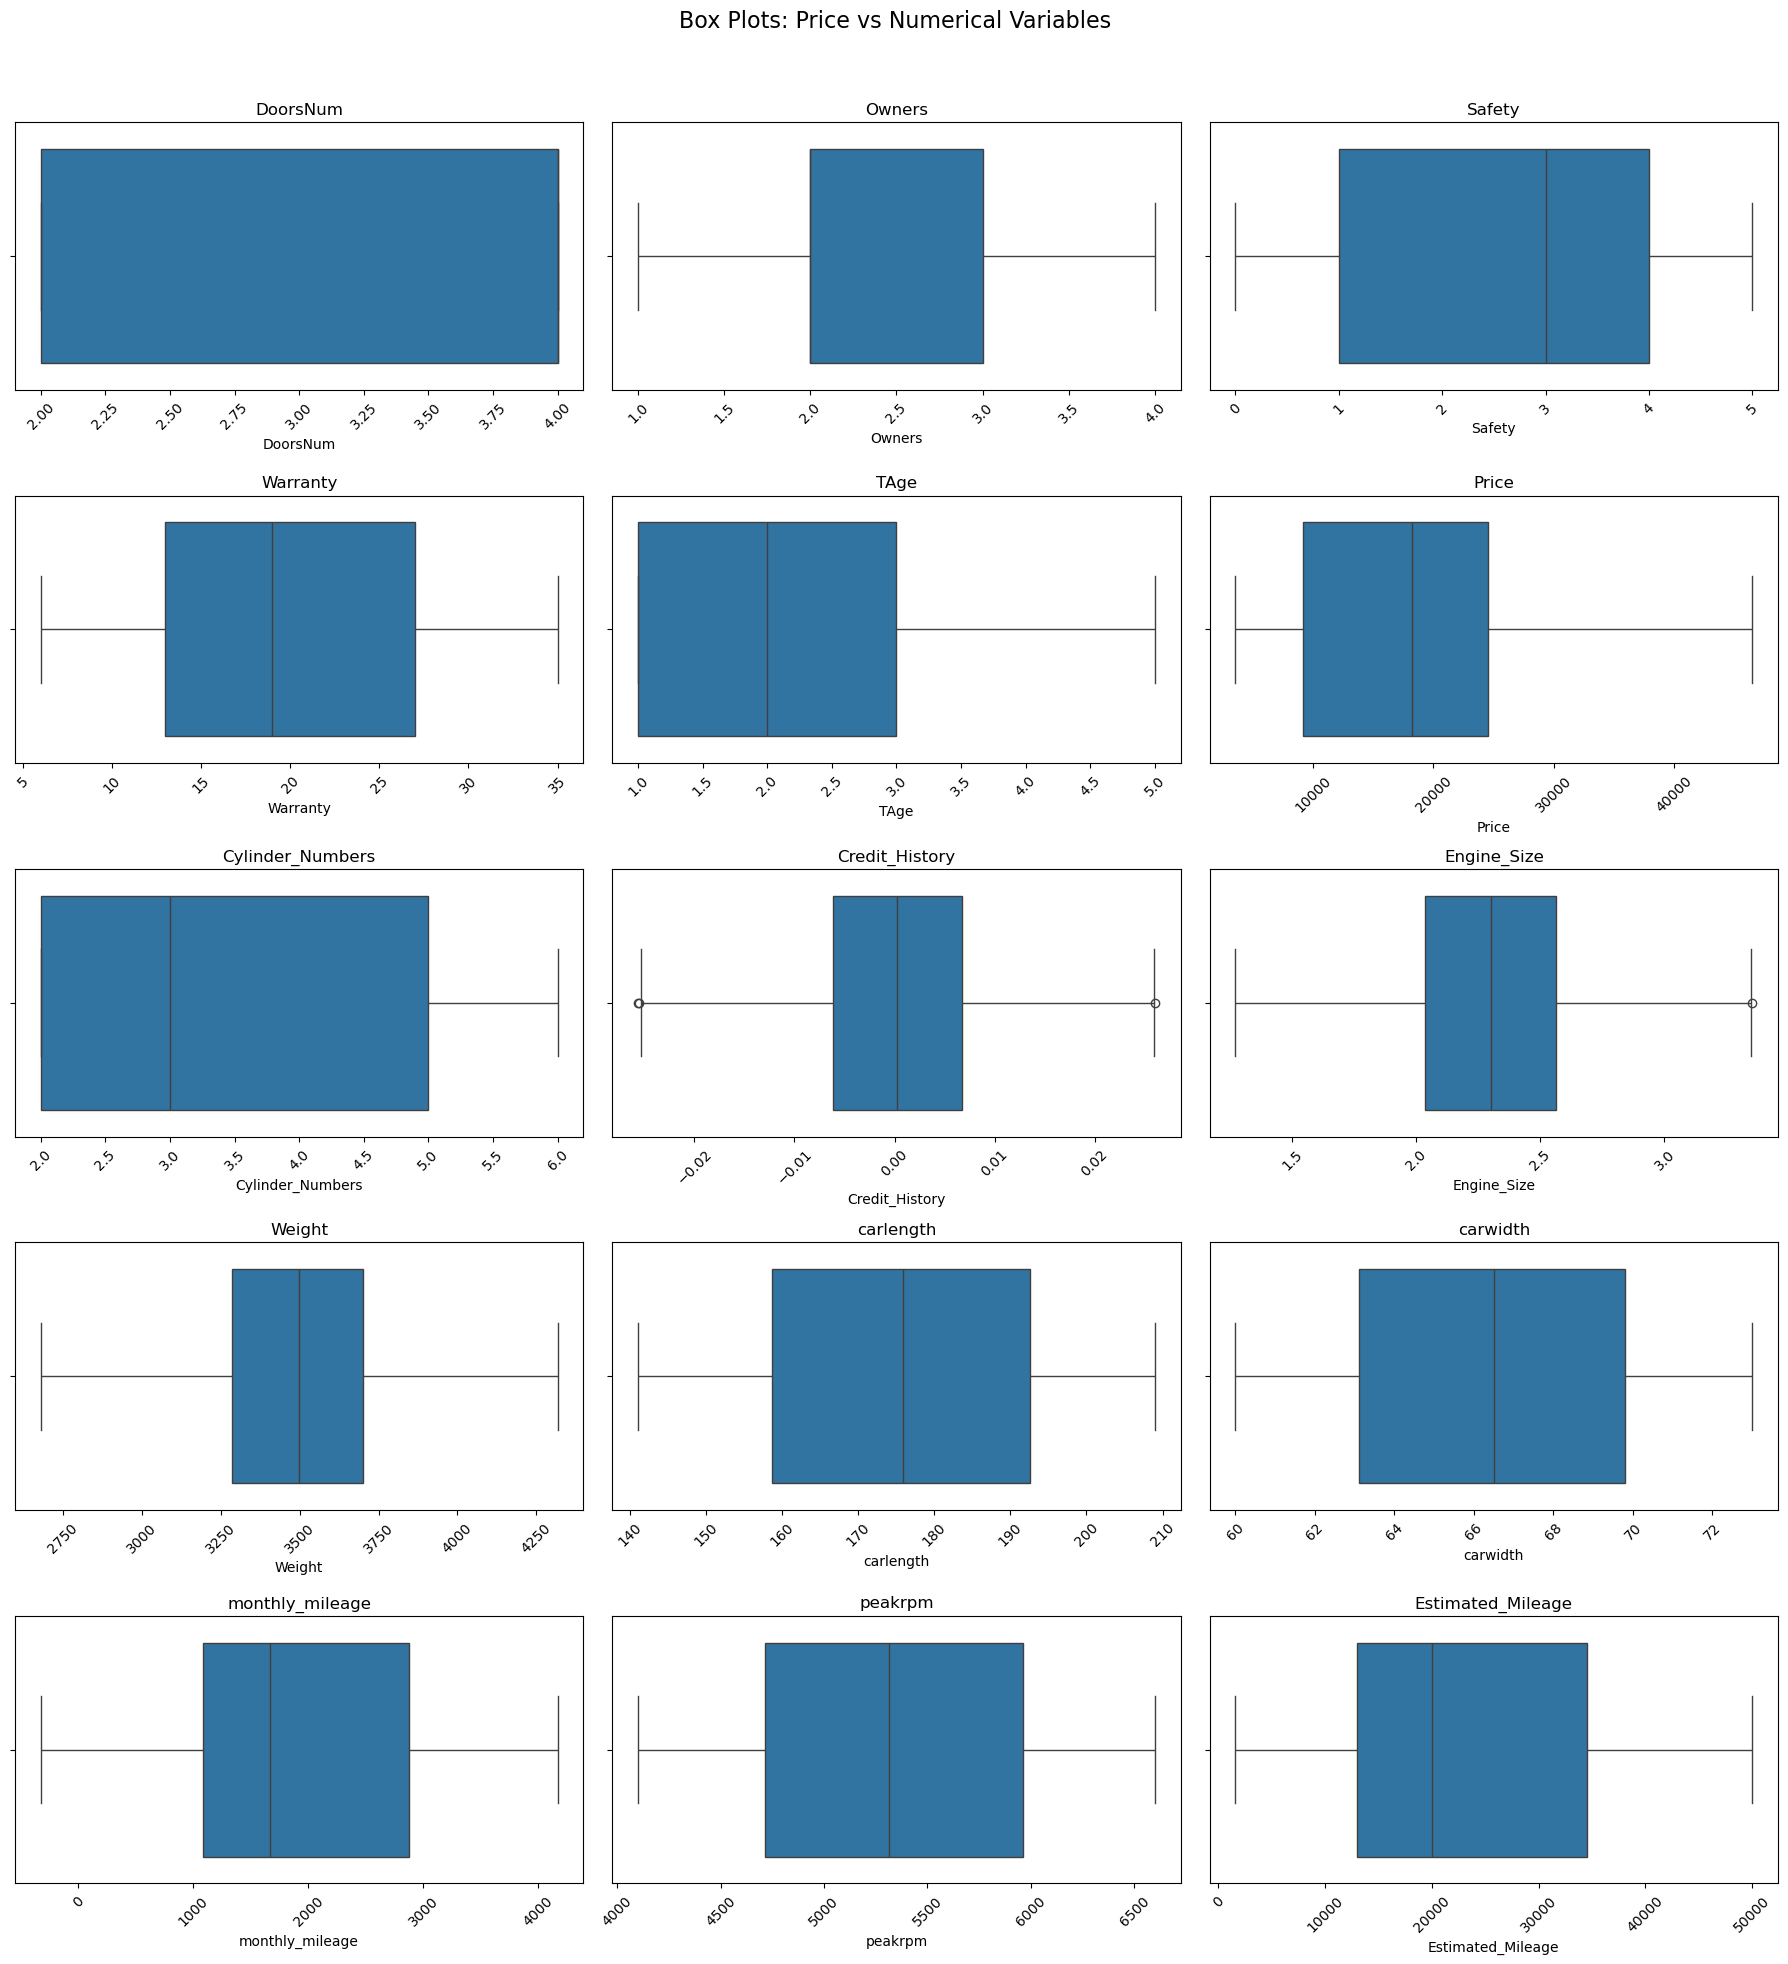

In [792]:
numerical_columns = df.select_dtypes(include='number').columns.drop(['Year']).tolist()

n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Box Plots: Price vs Numerical Variables', fontsize=16)

for i, feature in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{feature}')
    axs[row, col].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

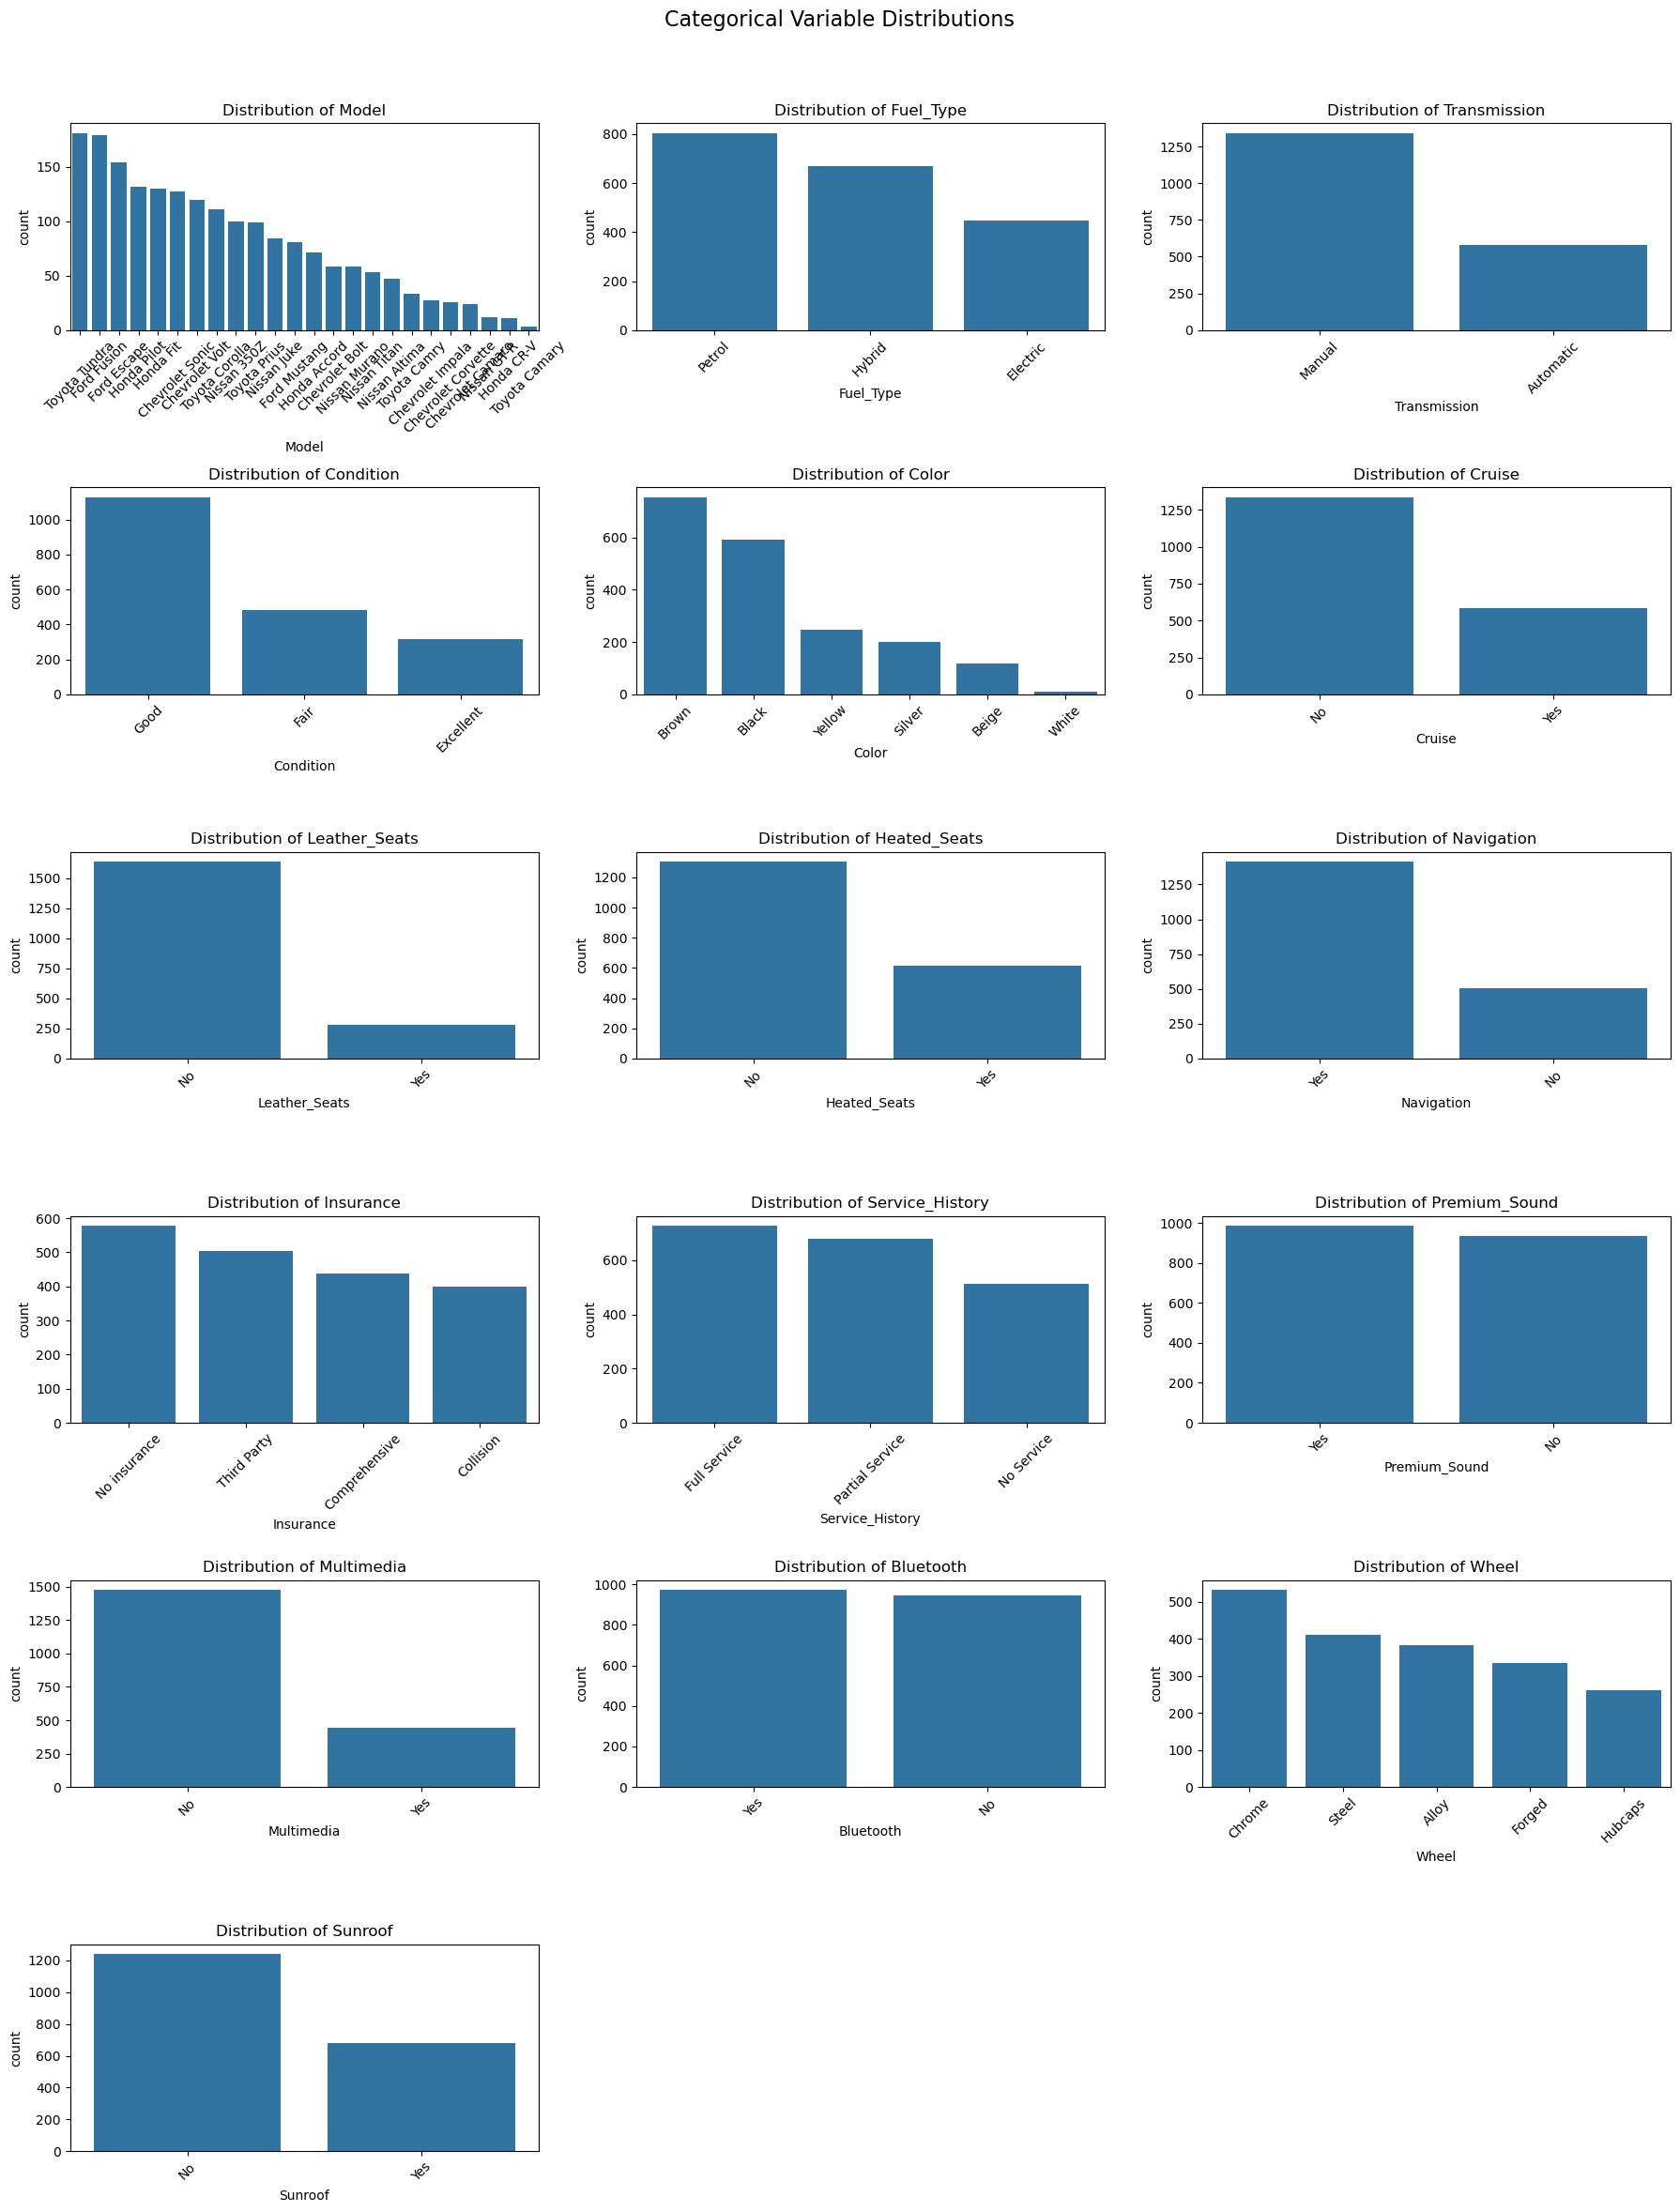

In [794]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()


n_cols = 3
n_rows = int(np.ceil(len(categorical_vars) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Categorical Variable Distributions', fontsize=16)

for i, col in enumerate(categorical_vars):
    row = i // n_cols
    col_idx = i % n_cols
    sns.countplot(x=col, data=df, ax=axs[row, col_idx], order=df[col].value_counts().index)
    axs[row, col_idx].set_title(f'Distribution of {col}')
    axs[row, col_idx].tick_params(axis='x', rotation=45)


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

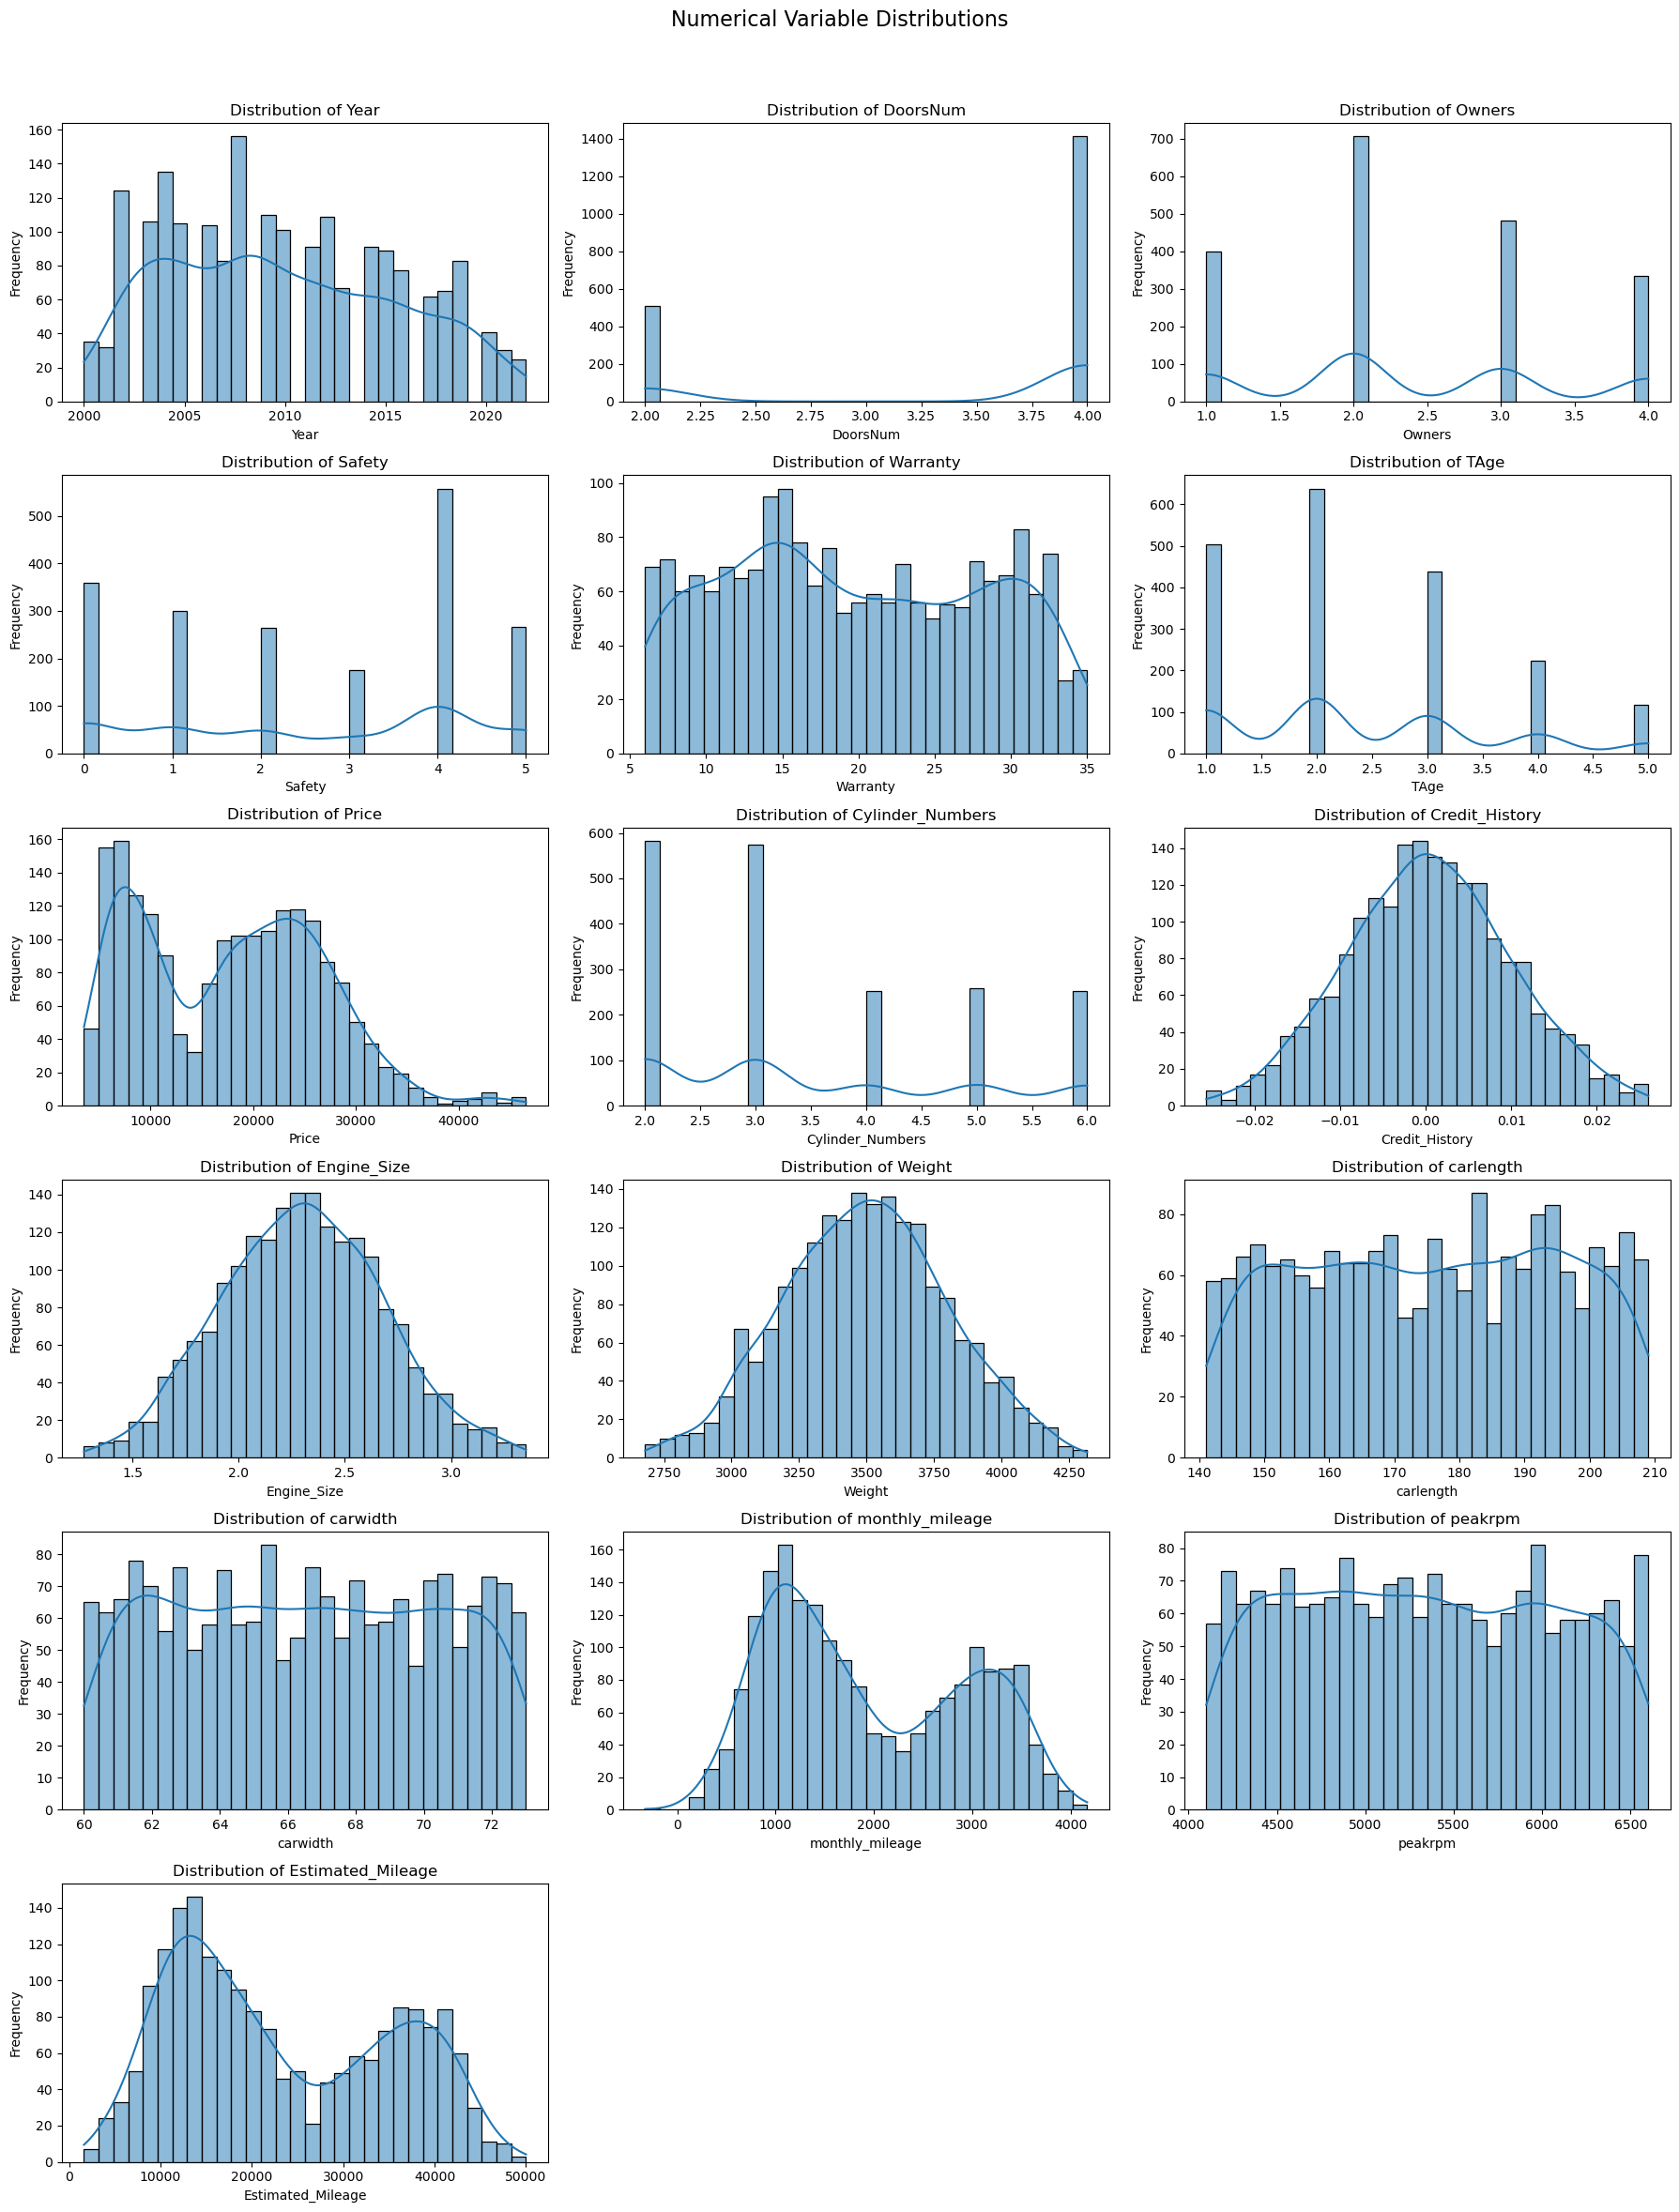

In [796]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


n_cols = 3
n_rows = int(np.ceil(len(numerical_vars) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Numerical Variable Distributions', fontsize=16)


for i, col in enumerate(numerical_vars):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df[col], kde=True, ax=axs[row, col_idx], bins=30)
    axs[row, col_idx].set_title(f'Distribution of {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Frequency')


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

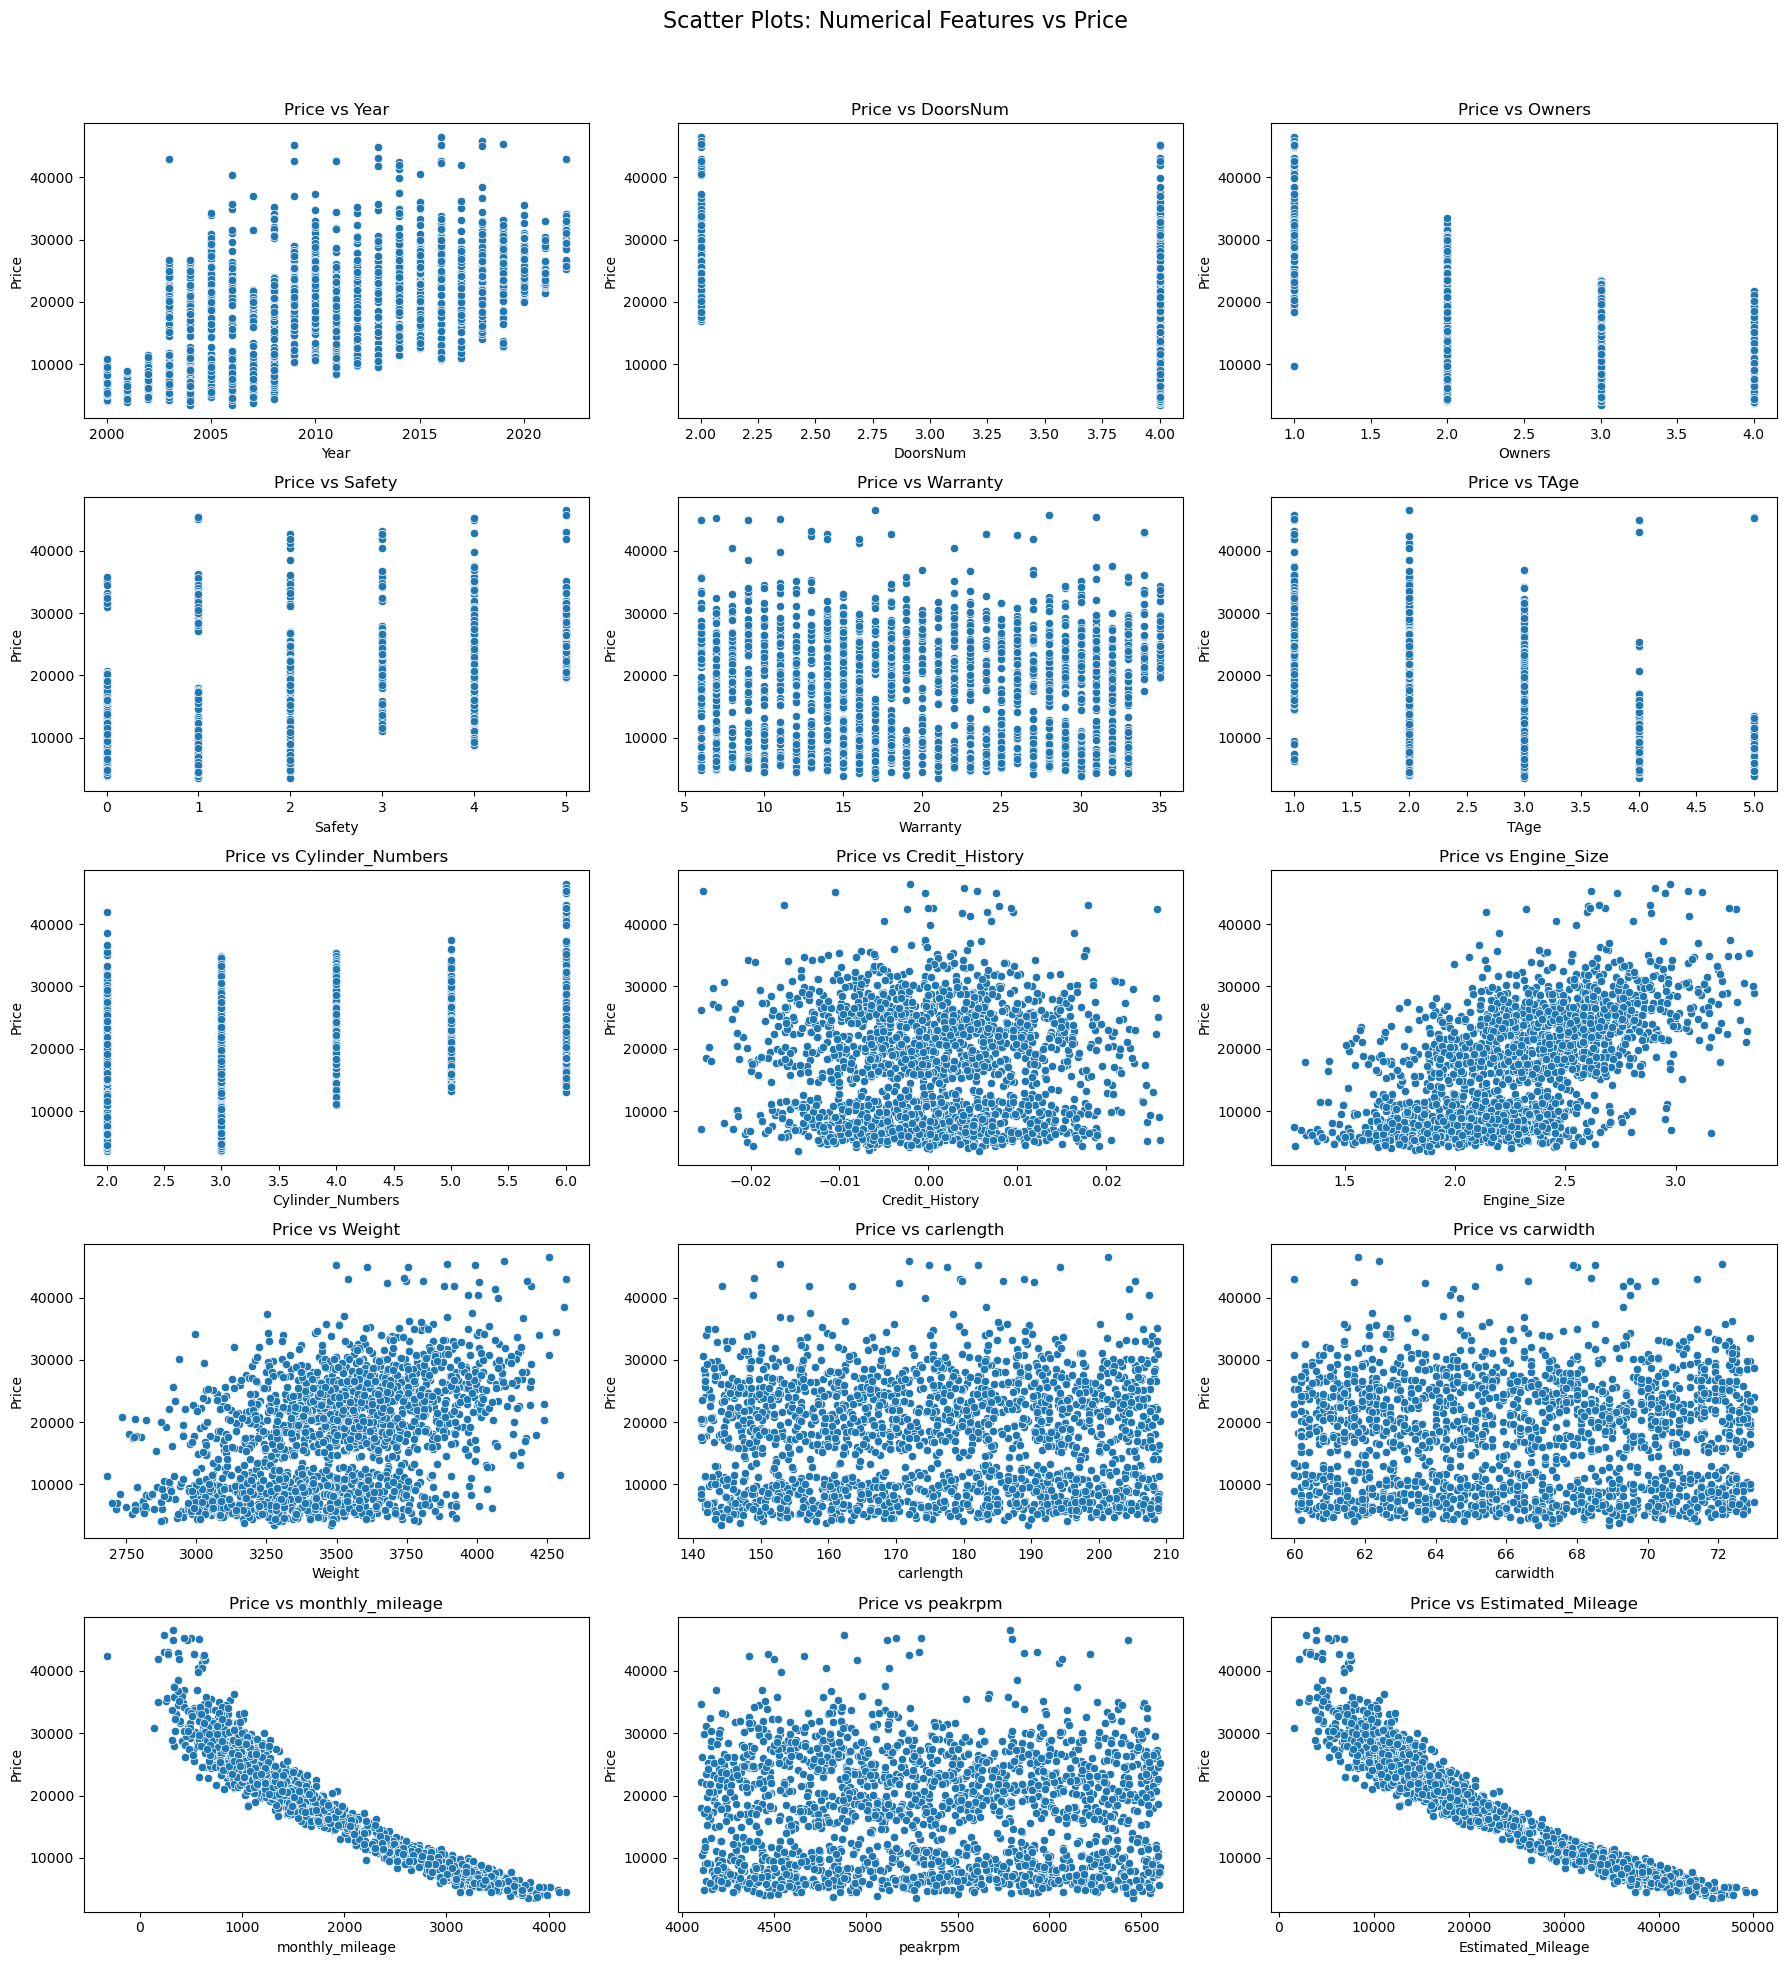

In [798]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Price')

n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
fig.suptitle('Scatter Plots: Numerical Features vs Price', fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.scatterplot(x=col, y='Price', data=df, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'Price vs {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Price')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

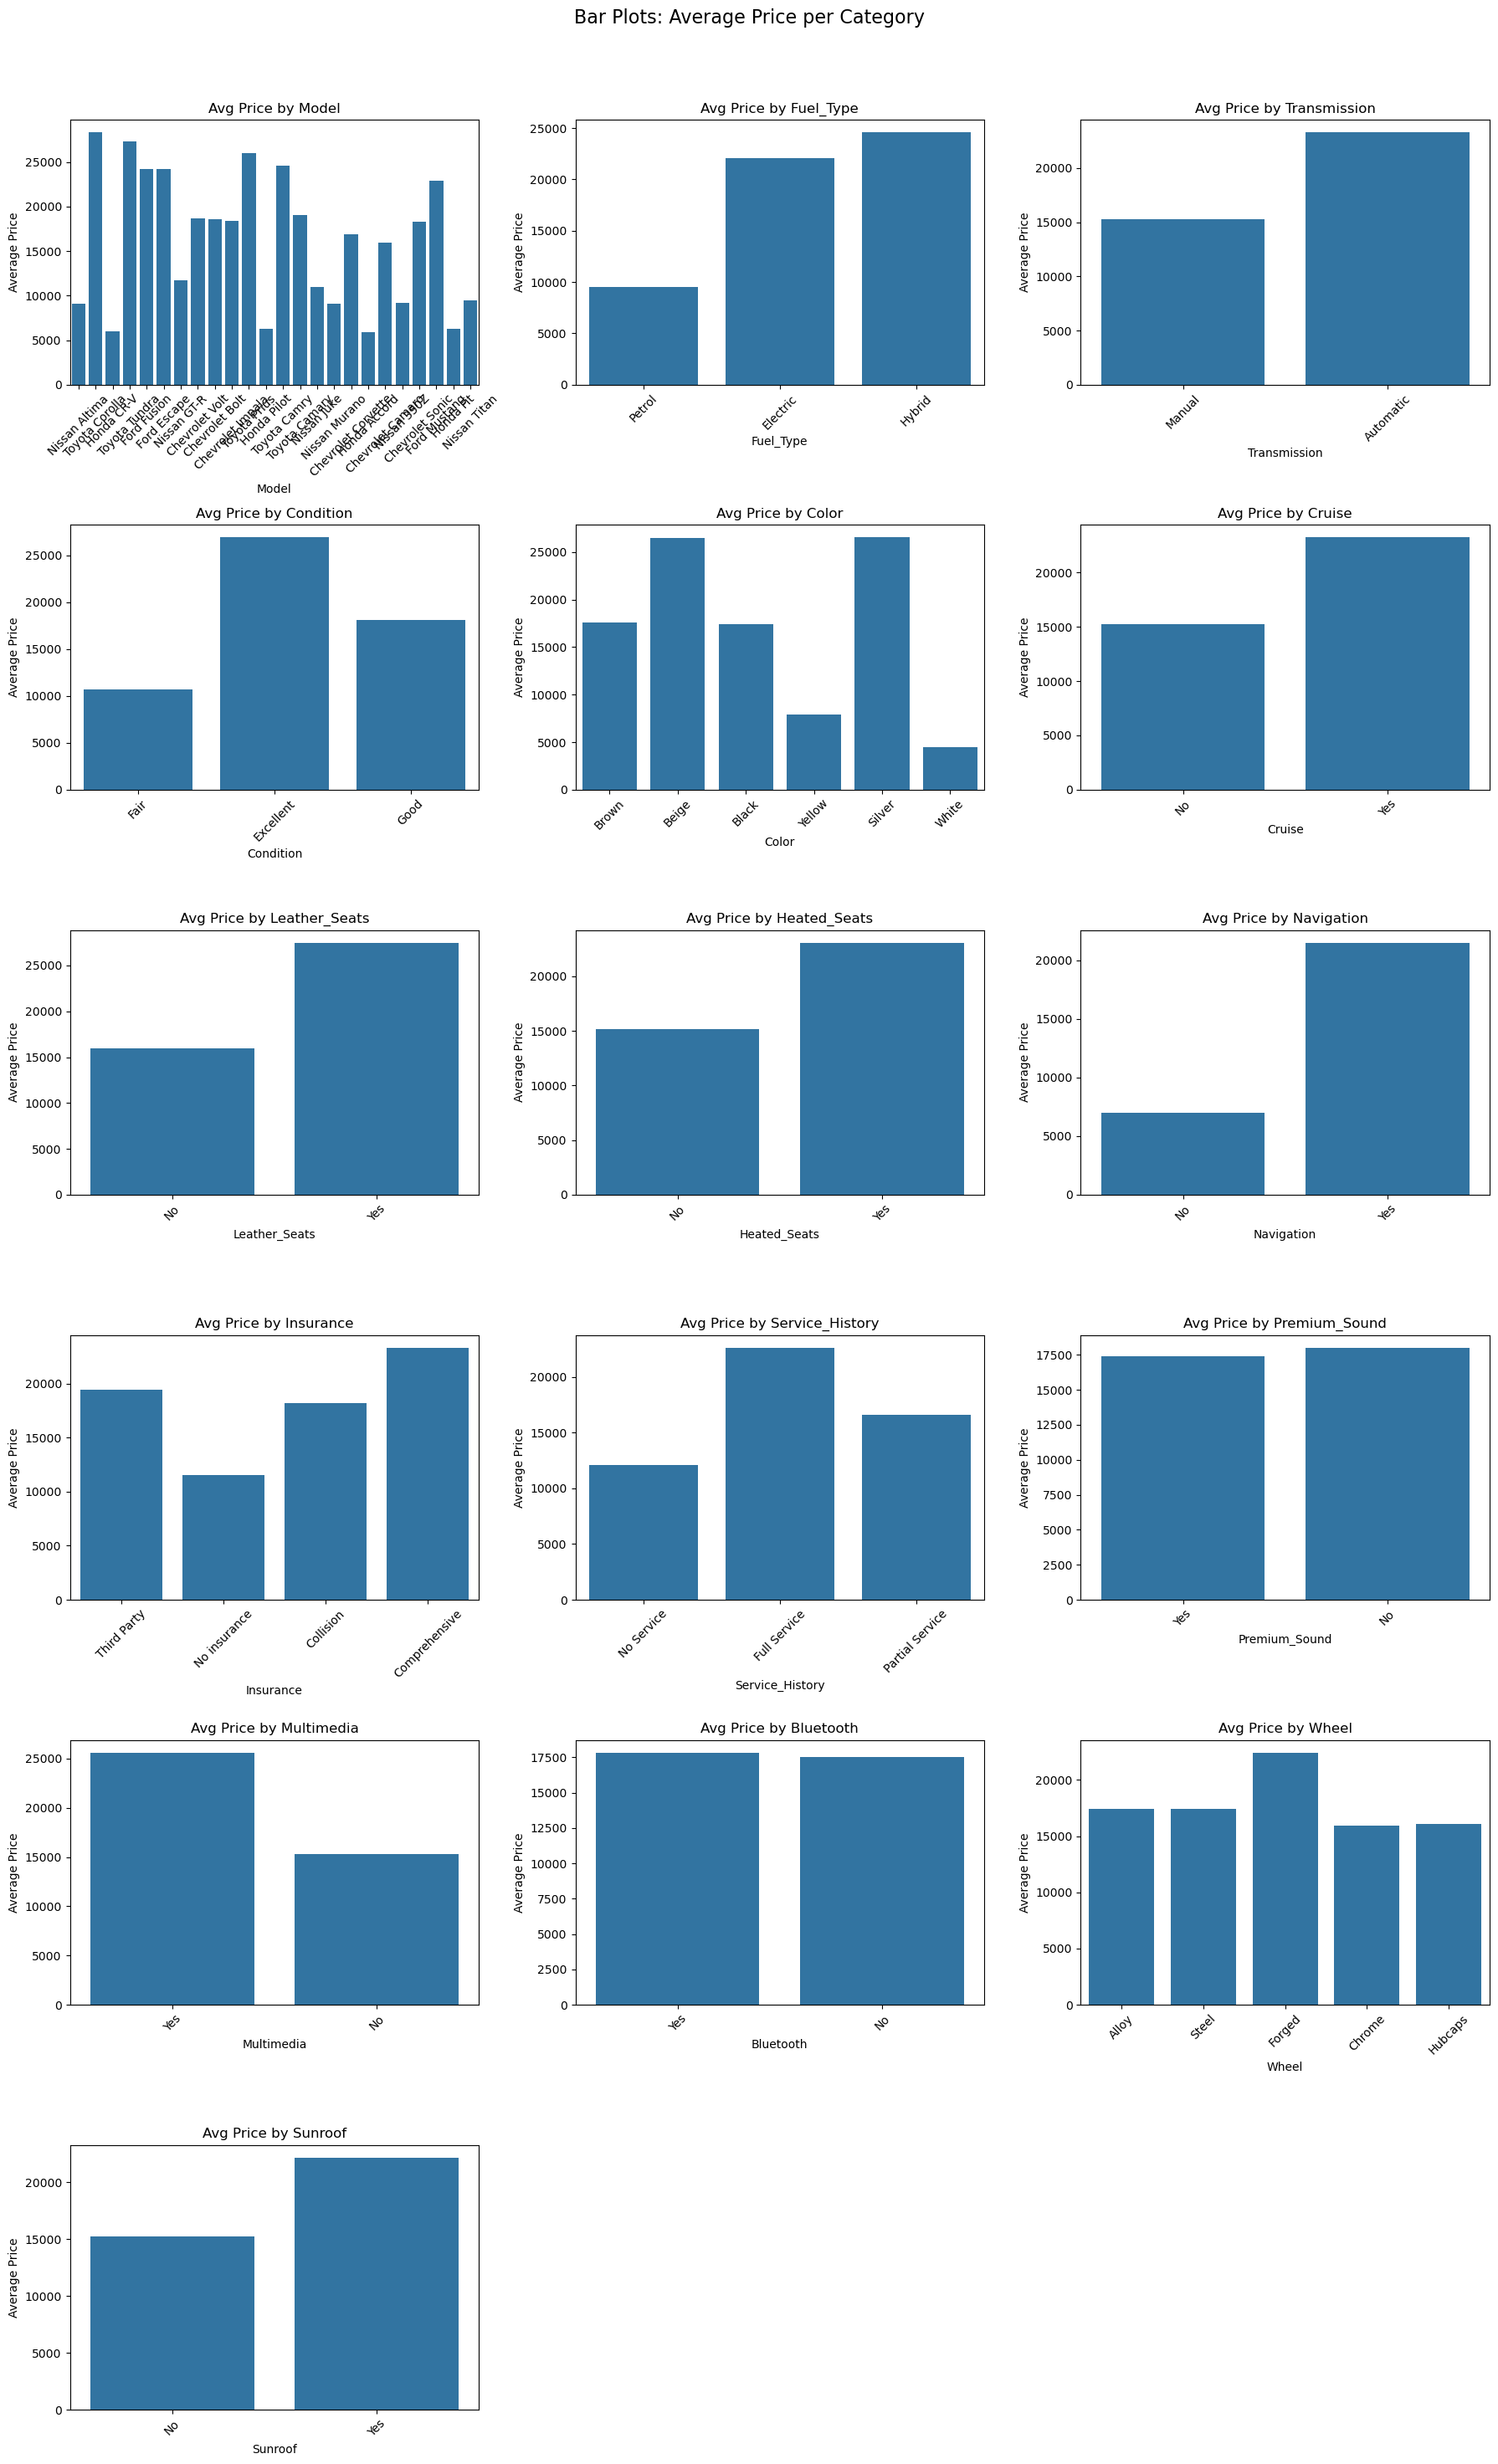

In [800]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()



n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('Bar Plots: Average Price per Category', fontsize=16)

for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.barplot(x=col, y='Price', data=df, ax=axs[row, col_idx], estimator=np.mean, ci=None)
    axs[row, col_idx].set_title(f'Avg Price by {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Average Price')
    axs[row, col_idx].tick_params(axis='x', rotation=45)


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1921 non-null   object 
 1   Year               1921 non-null   float64
 2   Fuel_Type          1921 non-null   object 
 3   Transmission       1921 non-null   object 
 4   DoorsNum           1921 non-null   float64
 5   Condition          1921 non-null   object 
 6   Color              1921 non-null   object 
 7   Cruise             1921 non-null   object 
 8   Leather_Seats      1921 non-null   object 
 9   Heated_Seats       1921 non-null   object 
 10  Navigation         1921 non-null   object 
 11  Owners             1921 non-null   float64
 12  Insurance          1921 non-null   object 
 13  Service_History    1921 non-null   object 
 14  Safety             1921 non-null   float64
 15  Premium_Sound      1921 non-null   object 
 16  Multimedia         1921 non-n

In [804]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [806]:
df.columns

Index(['Model', 'Year', 'Fuel_Type', 'Transmission', 'DoorsNum', 'Condition',
       'Color', 'Cruise', 'Leather_Seats', 'Heated_Seats', 'Navigation',
       'Owners', 'Insurance', 'Service_History', 'Safety', 'Premium_Sound',
       'Multimedia', 'Bluetooth', 'Wheel', 'Sunroof', 'Warranty', 'TAge',
       'Price', 'Cylinder_Numbers', 'Credit_History', 'Engine_Size', 'Weight',
       'carlength', 'carwidth', 'monthly_mileage', 'peakrpm',
       'Estimated_Mileage'],
      dtype='object')

In [808]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)


selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features)


Top 10 Selected Features:
 Index(['Year', 'Fuel_Type', 'Navigation', 'Owners', 'Safety', 'TAge',
       'Cylinder_Numbers', 'Engine_Size', 'monthly_mileage',
       'Estimated_Mileage'],
      dtype='object')


In [810]:
df_encoded

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,14,2007.0,2,1,4.0,1,2,0,0,0,...,8005.469674,2.0,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000.0,36245.697000
1,21,2019.0,0,1,4.0,0,0,1,0,1,...,25385.241860,2.0,-0.001383,2.696626,3543.006290,182.1,60.0,894.742606,4689.0,10736.911270
2,10,2004.0,2,1,4.0,1,2,0,0,0,...,6553.601733,3.0,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190.0,41953.925230
3,21,2020.0,0,1,4.0,2,2,1,1,1,...,24381.083350,3.0,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720.0,12446.975690
4,23,2017.0,1,0,4.0,2,2,1,0,0,...,28357.830640,5.0,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559.0,10560.549040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,22,2009.0,1,1,4.0,2,0,0,0,1,...,27432.761260,3.0,-0.001812,2.490928,3970.307055,178.4,61.0,651.291795,5359.0,7815.501538
2225,4,2013.0,0,0,4.0,2,3,1,0,0,...,15164.228470,2.0,0.013213,2.238645,4157.519949,194.4,71.1,2051.008598,4685.0,24612.103170
2226,11,2007.0,2,1,4.0,2,1,0,0,1,...,6250.307375,2.0,0.014196,2.283821,3058.960939,194.4,68.4,2965.163102,4977.0,35581.957220
2228,18,2003.0,2,1,4.0,2,2,0,0,0,...,8373.305539,3.0,-0.018665,1.944553,3748.991341,169.6,70.6,3053.176775,4502.0,36638.121300


In [812]:
df_encoded['Year'] = df_encoded['Year'].astype(int)

In [814]:
df_encoded

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,14,2007,2,1,4.0,1,2,0,0,0,...,8005.469674,2.0,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000.0,36245.697000
1,21,2019,0,1,4.0,0,0,1,0,1,...,25385.241860,2.0,-0.001383,2.696626,3543.006290,182.1,60.0,894.742606,4689.0,10736.911270
2,10,2004,2,1,4.0,1,2,0,0,0,...,6553.601733,3.0,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190.0,41953.925230
3,21,2020,0,1,4.0,2,2,1,1,1,...,24381.083350,3.0,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720.0,12446.975690
4,23,2017,1,0,4.0,2,2,1,0,0,...,28357.830640,5.0,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559.0,10560.549040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,22,2009,1,1,4.0,2,0,0,0,1,...,27432.761260,3.0,-0.001812,2.490928,3970.307055,178.4,61.0,651.291795,5359.0,7815.501538
2225,4,2013,0,0,4.0,2,3,1,0,0,...,15164.228470,2.0,0.013213,2.238645,4157.519949,194.4,71.1,2051.008598,4685.0,24612.103170
2226,11,2007,2,1,4.0,2,1,0,0,1,...,6250.307375,2.0,0.014196,2.283821,3058.960939,194.4,68.4,2965.163102,4977.0,35581.957220
2228,18,2003,2,1,4.0,2,2,0,0,0,...,8373.305539,3.0,-0.018665,1.944553,3748.991341,169.6,70.6,3053.176775,4502.0,36638.121300


In [816]:
from sklearn.model_selection import train_test_split


X = df_encoded[['Year', 'Fuel_Type', 'Navigation', 'Owners', 'Safety', 'TAge',
                'Cylinder_Numbers', 'Engine_Size', 'monthly_mileage', 'Estimated_Mileage']]
y = df_encoded['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1536, 10)
Testing set shape: (385, 10)


In [818]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


y_pred = baseline_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Baseline Model Evaluation:
Mean Squared Error (MSE): 6854595.168177183
R-squared Score: 0.9155243932980505


In [820]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

def evaluate_model(y_true, y_pred, label="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)  
    print(f"📊 {label} Evaluation:")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")  
    print("-" * 30)

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")


cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"📉 Cross-Validated RMSE (mean): {cv_rmse.mean():.2f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
📊 Train Evaluation:
MAE  : 705.76
MSE  : 1019947.87
RMSE : 1009.92
R²   : 0.99
------------------------------
📊 Test Evaluation:
MAE  : 1270.72
MSE  : 3147182.99
RMSE : 1774.03
R²   : 0.96
------------------------------
📉 Cross-Validated RMSE (mean): 1891.74


In [822]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


def evaluate_model(y_true, y_pred, label="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 {label} Evaluation:")
    print(f"MAE   : {mae:.2f}")
    print(f"MSE   : {mse:.2f}")
    print(f"RMSE  : {rmse:.2f}")
    print(f"R²    : {r2:.2f}")
    print("-" * 30)


evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")


📊 Train Evaluation:
MAE   : 1697.58
MSE   : 5400467.24
RMSE  : 2323.89
R²    : 0.93
------------------------------
📊 Test Evaluation:
MAE   : 1847.21
MSE   : 6854595.17
RMSE  : 2618.13
R²    : 0.92
------------------------------


In [824]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}


dt_model = DecisionTreeRegressor(random_state=42)


grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


best_dt_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)


y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)


def evaluate(y_true, y_pred, name="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)  
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} MSE: {mse:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R-squared: {r2:.4f}")
    print("-" * 30)


evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters: {'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Train MAE: 1019.40
Train MSE: 2259923.19
Train RMSE: 1503.30
Train R-squared: 0.9709
------------------------------
Test MAE: 1508.22
Test MSE: 4622746.14
Test RMSE: 2150.06
Test R-squared: 0.9430
------------------------------


In [826]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearSVR(random_state=42, max_iter=10000)


cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


best_model = grid_search.best_estimator_


best_model.fit(X_train_scaled, y_train)


y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)


def evaluate(y_true, y_pred, name="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred) 
    
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} MSE: {mse:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R-squared: {r2:.4f}")
    print("-" * 30)


evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")



Cross-Validation MSE: 349327501.23 ± 15584476.81
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'tol': 0.001}
Train MAE: 1683.76
Train MSE: 6114213.14
Train RMSE: 2472.69
Train R-squared: 0.9213
------------------------------
Test MAE: 1810.54
Test MSE: 7875155.29
Test RMSE: 2806.27
Test R-squared: 0.9029
------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

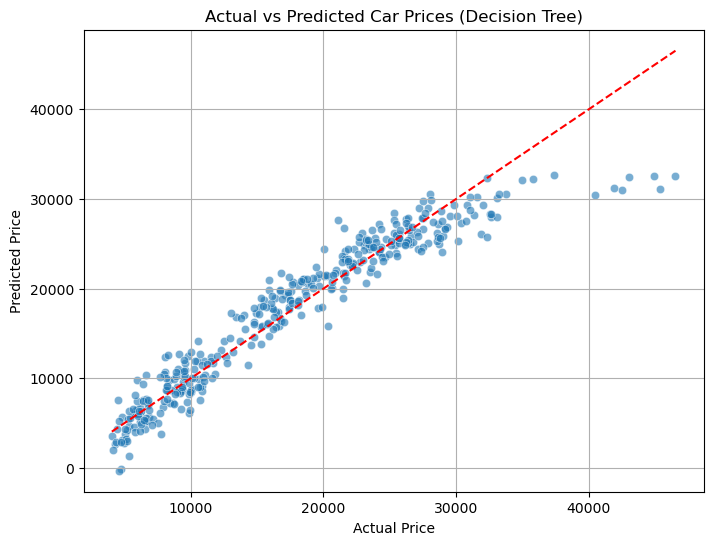

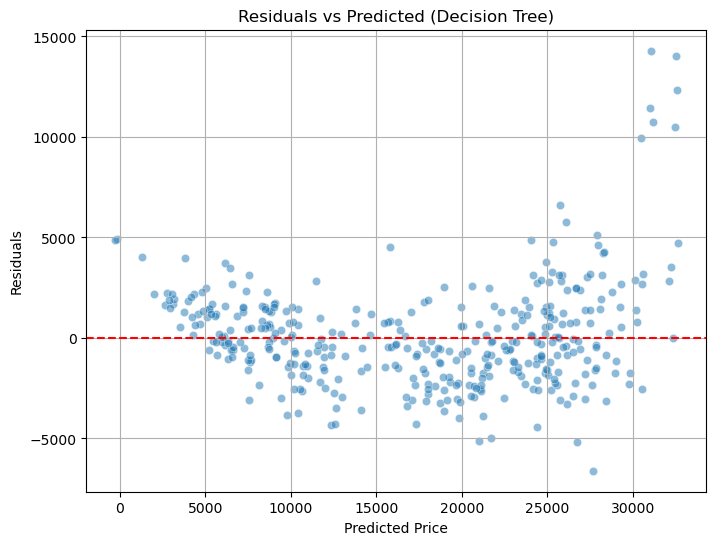

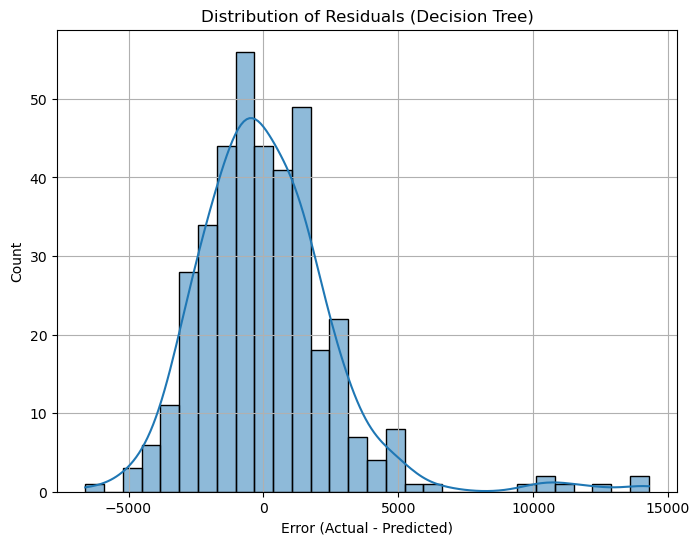

In [828]:
from sklearn.tree import DecisionTreeRegressor




plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Decision Tree)")
plt.grid(True)
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Decision Tree)")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals (Decision Tree)")
plt.xlabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()
